In [1]:
import numpy as np
from mpmath import *
import matplotlib.pyplot as plt

In [3]:
hbar = 1.0545718e-34
tau = 31e-12 # 31 ps, this number is from Mike's note
f0 = 12.642820e9
# f_rep = 119.596011e6
# f_rep = 118.92876e6
f_rep = 117.801308e6
x = (f0 % f_rep)/f_rep
n = f0 // f_rep
print('n = '+str(n)+'; x = '+str(x) )

def h(k):
    if k == 0:
        return 1
    else:
        return k*f_rep*tau*np.pi*csch(k*np.pi*f_rep*tau)

def Xi1(x, counts = 5000):
    ks = np.linspace(-counts, counts, 2*counts+1)
    Xi = 0
    for k in ks:
        if x == 0 and k == n:
            pass
        else:
            Xi = Xi + h(k)**2/(k-n-x)
            #Xi = Xi + 1/(k-n-x) # ideal case: the pulse is infinitesimally short
    return Xi

def Xi2(x, f_A, counts = 1000):
    ks = np.linspace(-counts, counts, 2*counts+1)
    Xi = 0
    tol = 1e-6
    for k in ks:
        if k == n: # If f_A = x*f_rep
#         if k == n+1: # If f_A = (1-x)*f_rep
            pass
        else:
            Xi = Xi + 0.5* h(k)**2*(1/(k-n-x+f_A/f_rep)+1/(k-n-x-f_A/f_rep))
    return Xi

n = 107.0; x = 0.32325654652323554


In [4]:
h(10000)

mpf('3.434335806966792e-48')

In [5]:
Xi1(0.1, counts = 5000)

mpf('-7.7303237196607064')

In [6]:
Xi1(0.1, counts = 10000)

mpf('-7.7303237196607064')

In [7]:
Xi1(0.1, counts = 20000)

mpf('-7.7303237196607064')

In [8]:
Xi2(0.1, 0.1*f_rep, counts = 300)

mpf('-1.539334573735385')

In [9]:
Xi2(0.1, 0.1*f_rep, counts = 1000)

mpf('-1.5337914912049633')

In [10]:
Xi2(0.1, 0.1*f_rep, counts = 2000)

mpf('-1.5337914906726584')

(-20, 20)

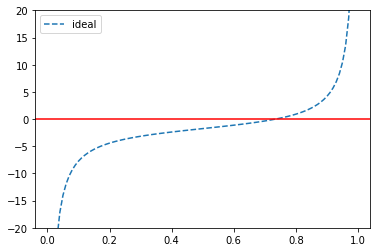

In [11]:
xs = np.linspace(0.01,0.99,99)
Xi1s = []

for x in xs:
    Xi1s.append(Xi1(x))
    
plt.plot(xs, Xi1s, '--', label='ideal')
# plt.plot(xs, relative_delta1s, label='delta_1')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend()
plt.ylim(-20,20)

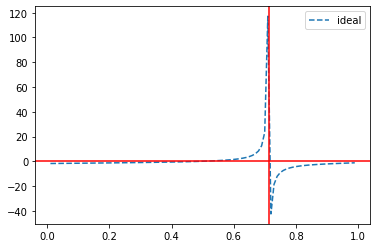

In [12]:
xs = np.linspace(0.01,0.99,99)
Xi2s = []

for x in xs:
    Xi2s.append(Xi2(x,(1-0.7126)*f_rep))
    
plt.plot(xs, Xi2s, '--', label='ideal')
# plt.plot(xs, relative_delta1s, label='delta_1')
plt.axhline(y=0, color='r', linestyle='-')
plt.axvline(x = 0.7126, color='r', linestyle='-')
plt.legend()


In [13]:
alpha = 1
f_M = 3e6

def relative_delta_1(x):
    return -Xi1(x)/h(n)**2

def relative_delta_MS11(x):
    return -(2*Xi2(x, 2*x*f_rep)+(alpha**2+alpha**(-2))*Xi1(x))/h(n)**2

def relative_delta_MS11_intra(x):
    return -(alpha**2+alpha**(-2))*Xi1(x)/h(n)**2

def relative_delta_MS11_inter(x):
    return -2*Xi2(x, 2*x*f_rep)/h(n)**2

def relative_delta_MS12(x):
    return -2*((alpha+alpha**(-1))*Xi2(x, x*f_rep)+(alpha-alpha**(-1))*h(n)**2*f_rep/f_M)/(h(n)**2)

def relative_delta_MS12_no_approx(x):
    return -2*(alpha*Xi2(x, (1-x)*f_rep+f_M)+alpha**(-1)*Xi2(x, -(1-x)*f_rep+f_M))/(h(n)**2)

def relative_delta_MS12_no_approx_2(x):
    return -2*(alpha*Xi2(x, x*f_rep+f_M)+alpha**(-1)*Xi2(x, -x*f_rep+f_M))/(h(n)**2)

# Stark shift in single-qubit rotation with one comb

$\delta^{(1)} = \delta_{1,1}*\xi_1(0)$, where 
$$
\delta_{1,1} = -\frac{|\Omega_{1,1}|^2}{2\pi f_{rep}}\\
\Omega_{1,1} = |S_1| I_1 |\Omega_0|\\
\Omega_0 = \frac{|\textbf{d}_0\cdot\hat{\sigma}_+|^2}{3\hbar^2}\frac{\omega_p}{\Delta(\Delta-\omega_p)}
$$

#### The ideal case: pulse is infinitesimally short

In [14]:
xs = np.linspace(0.01,0.99,50)
relative_delta1s_ideal = []

for x in xs:
    relative_delta1s_ideal.append(relative_delta_1(x))

(-20, 20)

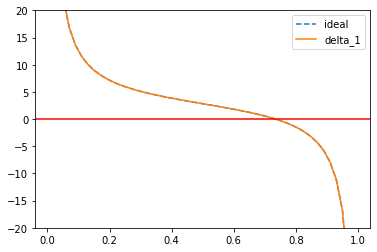

In [15]:
xs = np.linspace(0.01,0.99,50)
relative_delta1s = []

for x in xs:
    relative_delta1s.append(relative_delta_1(x))
    
plt.plot(xs, relative_delta1s_ideal, '--', label='ideal')
plt.plot(xs, relative_delta1s, label='delta_1')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend()
plt.ylim(-20,20)

## AC stark shift of MS gate 

0.001
0.01098
0.02096
0.03094
0.04092
0.0509
0.06088
0.07085999999999999
0.08084
0.09082
0.1008
0.11077999999999999
0.12075999999999999
0.13074
0.14071999999999998
0.1507
0.16068
0.17065999999999998
0.18064
0.19061999999999998
0.2006
0.21058
0.22055999999999998
0.23054
0.24051999999999998
0.25049999999999994
0.26048
0.27046
0.28043999999999997
0.29041999999999996
0.3004
0.31038
0.32036
0.33033999999999997
0.34031999999999996
0.3503
0.36028
0.37026
0.38023999999999997
0.39021999999999996
0.4002
0.41018
0.42016
0.43013999999999997
0.44011999999999996
0.45009999999999994
0.46008
0.47006
0.48003999999999997
0.49001999999999996
0.49999999999999994
0.50998
0.51996
0.52994
0.53992
0.5498999999999999
0.5598799999999999
0.5698599999999999
0.5798399999999999
0.58982
0.5998
0.60978
0.61976
0.62974
0.63972
0.6496999999999999
0.6596799999999999
0.6696599999999999
0.6796399999999999
0.6896199999999999
0.6996
0.70958
0.71956
0.72954
0.73952
0.7494999999999999
0.7594799999999999
0.7694599999999999
0.7

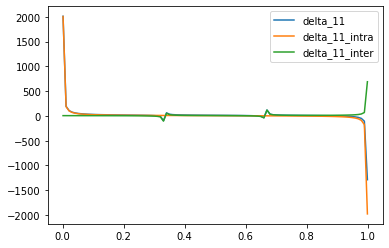

In [17]:
xs = np.linspace(0.001,0.999,101)
deltas = []
relative_delta11s = []
relative_delta11s_intra = []
relative_delta11s_inter = []
relative_delta12s = []
for x in xs:
    relative_delta11s.append(relative_delta_MS11(x))
    relative_delta11s_intra.append(relative_delta_MS11_intra(x))
    relative_delta11s_inter.append(relative_delta_MS11_inter(x))
    relative_delta12s.append(relative_delta_MS12(x))
    print(x)
plt.plot(xs, relative_delta11s,label='delta_11')
plt.plot(xs, relative_delta11s_intra,label='delta_11_intra')
plt.plot(xs, relative_delta11s_inter,label='delta_11_inter')
plt.legend()

### Stark shift generated by the two frequency combs of global beam only

(-20, 20)

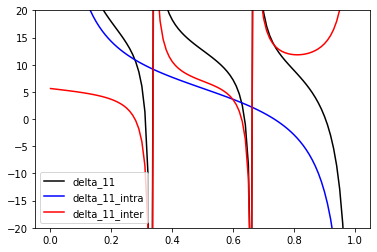

In [18]:
plt.plot(xs, relative_delta11s,'k',label='delta_11')
plt.plot(xs, relative_delta11s_intra,'b', label='delta_11_intra')
plt.plot(xs, relative_delta11s_inter,'r', label='delta_11_inter')
plt.legend()
plt.ylim(-20,20)

### Stark shift generated by the freq comb of ind and global beam

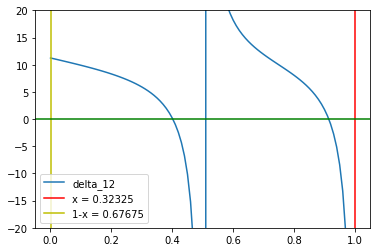

In [19]:
plt.plot(xs, relative_delta12s,label='delta_12')
plt.axvline(x=x,color='r', linestyle='-', label = 'x = 0.32325')
plt.axvline(x=1-x,color='y', linestyle='-', label = '1-x = 0.67675')
plt.axhline(y=0,color='g', linestyle='-')
plt.ylim(-20,20)
plt.legend()

# No Approximation

### If we choose f_A = (1-x)*f_rep

0.001
0.01098
0.02096
0.03094
0.04092
0.0509
0.06088
0.07085999999999999
0.08084
0.09082
0.1008
0.11077999999999999
0.12075999999999999
0.13074
0.14071999999999998
0.1507
0.16068
0.17065999999999998
0.18064
0.19061999999999998
0.2006
0.21058
0.22055999999999998
0.23054
0.24051999999999998
0.25049999999999994
0.26048
0.27046
0.28043999999999997
0.29041999999999996
0.3004
0.31038
0.32036
0.33033999999999997
0.34031999999999996
0.3503
0.36028
0.37026
0.38023999999999997
0.39021999999999996
0.4002
0.41018
0.42016
0.43013999999999997
0.44011999999999996
0.45009999999999994
0.46008
0.47006
0.48003999999999997
0.49001999999999996
0.49999999999999994
0.50998
0.51996
0.52994
0.53992
0.5498999999999999
0.5598799999999999
0.5698599999999999
0.5798399999999999
0.58982
0.5998
0.60978
0.61976
0.62974
0.63972
0.6496999999999999
0.6596799999999999
0.6696599999999999
0.6796399999999999
0.6896199999999999
0.6996
0.70958
0.71956
0.72954
0.73952
0.7494999999999999
0.7594799999999999
0.7694599999999999
0.7

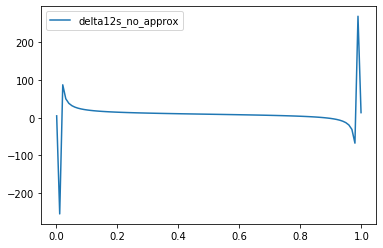

In [20]:
xs = np.linspace(0.001,0.999,101)

relative_delta12s_no_approx = []
for x in xs:
    relative_delta12s_no_approx.append(relative_delta_MS12_no_approx(x))
    print(x)
    
plt.plot(xs, relative_delta12s_no_approx,label='delta12s_no_approx')
plt.legend()

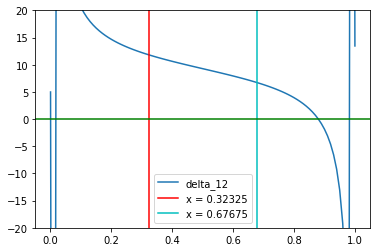

In [21]:
plt.plot(xs, relative_delta12s_no_approx, label='delta_12')
plt.axvline(x=0.32325,color='r', linestyle='-', label = 'x = 0.32325')
plt.axvline(x=0.67675,color='c', linestyle='-', label = 'x = 0.67675')
# plt.axvline(x=1-0.7126,color='y', linestyle='-', label = '1-x = 0.2874')
plt.axhline(y=0,color='g', linestyle='-')
plt.ylim(-20,20)
plt.legend()

### If we choose f_A = x*f_rep

0.001
0.01098
0.02096
0.03094
0.04092
0.0509
0.06088
0.07085999999999999
0.08084
0.09082
0.1008
0.11077999999999999
0.12075999999999999
0.13074
0.14071999999999998
0.1507
0.16068
0.17065999999999998
0.18064
0.19061999999999998
0.2006
0.21058
0.22055999999999998
0.23054
0.24051999999999998
0.25049999999999994
0.26048
0.27046
0.28043999999999997
0.29041999999999996
0.3004
0.31038
0.32036
0.33033999999999997
0.34031999999999996
0.3503
0.36028
0.37026
0.38023999999999997
0.39021999999999996
0.4002
0.41018
0.42016
0.43013999999999997
0.44011999999999996
0.45009999999999994
0.46008
0.47006
0.48003999999999997
0.49001999999999996
0.49999999999999994
0.50998
0.51996
0.52994
0.53992
0.5498999999999999
0.5598799999999999
0.5698599999999999
0.5798399999999999
0.58982
0.5998
0.60978
0.61976
0.62974
0.63972
0.6496999999999999
0.6596799999999999
0.6696599999999999
0.6796399999999999
0.6896199999999999
0.6996
0.70958
0.71956
0.72954
0.73952
0.7494999999999999
0.7594799999999999
0.7694599999999999
0.7

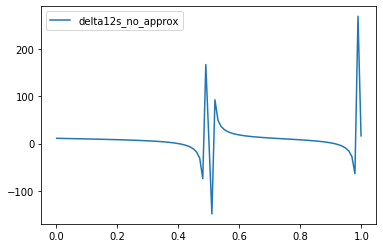

In [22]:
xs = np.linspace(0.001,0.999,101)

relative_delta12s_no_approx_2 = []
for x in xs:
    relative_delta12s_no_approx_2.append(relative_delta_MS12_no_approx_2(x))
    print(x)
    
plt.plot(xs, relative_delta12s_no_approx_2,label='delta12s_no_approx')
plt.legend()

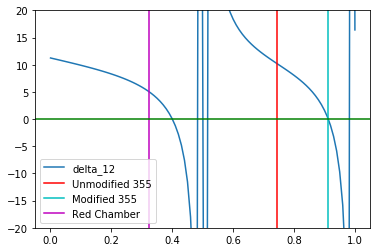

In [23]:
plt.plot(xs, relative_delta12s_no_approx_2, label='delta_12')
plt.axvline(x=0.7426,color='r', linestyle='-', label = 'Unmodified 355')
plt.axvline(x=0.91,color='c', linestyle='-', label = 'Modified 355')
plt.axvline(x=0.32325,color='m', linestyle='-', label = 'Red Chamber')
# plt.axvline(x=1-0.7126,color='y', linestyle='-', label = '1-x = 0.2874')
plt.axhline(y=0,color='g', linestyle='-')
plt.ylim(-20,20)
plt.legend()